## Web Scraping pada Website kalibrr.id Menggunakan Python

Web scraping (atau juga disebut sebagai web data mining atau web harvesting) adalah teknik pengambilan data dari halaman web secara otomatis dengan menggunakan perangkat lunak tertentu. Teknik ini digunakan untuk mengekstrak informasi dari berbagai situs web, termasuk teks, gambar, audio, video, dan informasi lainnya yang dapat diakses melalui jaringan internet.

Web scraping dapat dilakukan dengan menggunakan berbagai teknologi dan metode, seperti crawling, parsing, scraping, dan ekstraksi data. Tujuan dari web scraping adalah untuk mengumpulkan data dari berbagai sumber yang berbeda dan menggunakannya untuk berbagai tujuan, seperti penelitian pasar, analisis data, pengumpulan berita, dan sebagainya.

Namun, perlu diingat bahwa beberapa situs web mungkin melarang atau menghambat penggunaan teknik web scraping pada halaman web mereka, sehingga penggunaan teknik ini harus dilakukan dengan hati-hati dan dengan memperhatikan hak cipta dan privasi.


www.kalibrr.id adalah situs web yang menyediakan platform untuk pencarian pekerjaan dan rekrutmen di Indonesia. Situs ini memungkinkan perusahaan untuk memposting lowongan pekerjaan mereka dan mencari kandidat yang cocok untuk posisi tersebut, serta memungkinkan pencari kerja untuk mencari lowongan pekerjaan yang sesuai dengan kualifikasi dan minat mereka.

<img src="asset/kalibrr_id.png">

Sebelum memulai scraping web menggunakan python ada beberapa hal yang perlu disiapkan. Pertama, kita harus menginstall library yang diperlukan untuk scraping web yaitu "request" ,"bs4" dan "pandas. Pada library "bs4" kita akan menggunakan sebuah fungsi yang bernama BeautifulSoup yang berguna untuk proses pengambilan data pada website. Pastikan anda install libary sebagai berikut :


1. "Requests" digunakan untuk mengirim permintaan HTTP ke server dan mendapatkan respon
2. "BeautifulSoup" digunakan untuk melakukan parsing atau ekstraksi data dari HTML dan XML
3. "Pandas" digunakan untuk membantu mengelola data yang telah di scrape dan melakukan analisis data
4. "Flask"
5. "Matplotlib"


## Setting Virtual Environment , Kernel and Requirement Dependencies

Environment dan Kernel pada Jupyter Notebook berfungsi untuk memastikan bahwa dependensi dan pustaka yang digunakan pada proyek atau aplikasi tertentu terisolasi dan tidak mempengaruhi proyek atau aplikasi lain. Kernel, sebagai bagian inti dari sistem, bertanggung jawab untuk mengeksekusi kode dalam bahasa pemrograman tertentu dan dapat diganti sesuai kebutuhan.

a. Untuk Membuat Virtual Environment dan kernel, buka Anaconda Prompt dengan perintah sebagai berikut :

- conda create -n <ENV_NAME> python=3.10
- conda activate <ENV_NAME>

- conda install ipykernel
- python -m ipykernel install --user --name <ENV_NAME>

b. Requirement Dependencies, atau dependensi kebutuhan, adalah daftar pustaka, modul, atau perangkat lunak lainnya yang diperlukan oleh suatu program atau aplikasi untuk berjalan dengan benar. Dalam pengembangan perangkat lunak, daftar dependensi biasanya didefinisikan dalam sebuah file yang disebut "requirements file". Seluruh dependecies telah di-export ke dalam file requirements.txt. Oleh karena itu untuk melakukan install packages anda hanya perlu melakukan install pakage sebagai berikut :

- pip install -r requirements.txt --user

untuk memastikan seluruh dependecies sudah ter-install, kita bisa melakukan pengecekan dengan perintah berikut :

- conda list -n <ENY_NAME>

<img src="asset/capture_list_env.png">



In [173]:
import requests
import re
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup
import pandas as pd

In [174]:
def divElement(page_no) :
    url = "https://www.kalibrr.id/job-board/te/data/co/Indonesia/"
    pageFilter = "?sort=Freshness"

    url_get = requests.get(url+str(page_no)+pageFilter)

    soup = BeautifulSoup(url_get.content,"html.parser")

    div_elements = soup.find_all('div', attrs={'class':'k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6'})
    # print(len(div_elements))
    return div_elements
print("reading html element......!!!")

reading html element......!!!


In [175]:
from cgitb import text
import string

def pre_text(pretext):

    pretext = pretext.lower()
    pretext = pretext.translate(str.maketrans('', '', string.punctuation))
    pretext = ' '.join(pretext.split())
    pretext = pretext.strip()
    return pretext


In [205]:
def getJobInfo(job) :

    job_company = job.select_one('div.k-col-start-3.k-row-start-3 a')
    if job_company is not None :
        # print('Company :',job_company.text.strip())
        job_company = pre_text(job_company.text)

    # for job_titles :
    job_title = job.select_one('div.k-col-start-3.k-row-start-1 h2 a')
    if job_title is not None:
        # print('Position :',job_title.text.strip())
        job_title = pre_text(job_title.text)

    # for job_locations :
    job_location = job.select_one('div.k-col-start-3.k-row-start-3 a.k-text-subdued.k-block')
    if job_location is not None :
        job_location = job_location.text.replace('\n', "").replace(',', '').strip()
        
        job_location = re.sub(r"\b(?:Indonesia|City|Kota|Kabupaten)\b", "", job_location, flags=re.IGNORECASE).strip()
        # print('Location :',job_location)
    
    # for date info     
    posted_info = job.select_one('div.k-col-start-5.k-row-start-1 span:first-of-type')
    if posted_info is not None :
        posted_info = posted_info.text.strip()
        published_at, application_deadline = posted_info.split("• Apply before")
        published_at = published_at.replace('ago', '').replace('Posted', '').strip()
        application_deadline = application_deadline.strip()

    job_data = [job_company, job_title, job_location, published_at, application_deadline]
    return job_data

print("get job info....!!")


get job info....!!


In [206]:
def save_file() :
    i = 0

    job_desc = divElement(page_no=page)
    # print("Total Save :",len(job_desc))

    for job in job_desc :
        i = i + 1
        job_info = getJobInfo(job)
        csv.write(job_info[0]+ ',' + job_info[1] + ',' + job_info[2] + ',' + job_info[3] + "," + job_info[4]+ '\n')
        # print("save",i)


In [207]:
csv=open("db_kalibrr.csv", 'w')
headers = "Company,Title,Location,Published_At,Application_Deadline\n"
csv.write(headers)


for page in range(1,16):

    print('Page from :',page)

    save_file()

print('Scraping is successful !!')

csv.close()   

Page from : 1
Page from : 2
Page from : 3
Page from : 4
Page from : 5
Page from : 6
Page from : 7
Page from : 8
Page from : 9
Page from : 10
Page from : 11
Page from : 12
Page from : 13
Page from : 14
Page from : 15
Scraping is successful !!


In [310]:
df = pd.read_csv('db_kalibrr.csv')

In [311]:
df.head(15)

,Company,Title,Location,Published_At,Application_Deadline
0,paninbank,mis data analytics,Jakarta Pusat,2 days,11 May
1,pt panin daiichi life bancassurance,bancassurance oficer area pluit cengkareng bek...,North Jakarta,2 days,3 Jul
2,pt mobilitas digital indonesia,b2b commercial sales account,East Jakarta,2 days,4 Jun
3,ati business group,corporate it leader,Central Jakarta,2 days,3 Jul
4,schoters,data analyst,South Jakarta,2 days,3 Jul
5,pt panin daiichi life bancassurance,bancassurance officer area dki jakarta jawa barat,Central Jakarta,2 days,16 May
6,kompas gramedia,news video editor kompascom solo,Surakarta,3 days,30 Jul
7,pt global urban esensial,growth b2c lead,South Tangerang,3 days,2 Jul
8,pt alam sutera realty tbk,finance accounting staff pasar kemis kab tange...,Tangerang,3 days,2 Jul
9,pt sinar mitra sepadan finance smsfinance,hr industrial relation specialist,Jakarta Selatan,3 days,2 Jul


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               225 non-null    object
 1   Title                 225 non-null    object
 2   Location              225 non-null    object
 3   Published_At          225 non-null    object
 4   Application_Deadline  225 non-null    object
dtypes: object(5)
memory usage: 8.9+ KB


In [182]:
df.duplicated().value_counts()

False    225
Name: count, dtype: int64

In [183]:
df.isna().sum()

Company                 0
Title                   0
Location                0
Published_At            0
Application_Deadline    0
dtype: int64

In [309]:
df['Location'].value_counts()

Location
Jakarta Selatan    73
Jakarta Pusat      38
Tangerang          33
Jakarta            27
Jakarta Utara      18
Jakarta Barat      10
Surabaya            5
Jakarta Timur       4
Bogor               4
Bandung             3
Makassar            2
Surakarta           1
Badung              1
Sumbawa             1
Denpasar            1
Palembang           1
Yogyakarta          1
Blitar              1
Bekasi              1
Name: count, dtype: int64

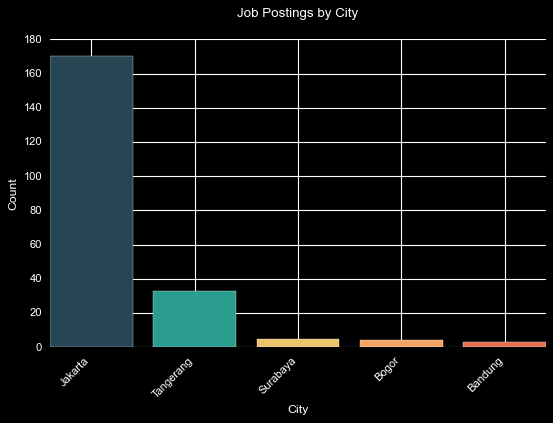

<Figure size 800x480 with 0 Axes>

In [302]:
import matplotlib.pyplot as plt

kota_ubah = df[df['Location'].str.contains('jakarta', case=False)]

# Ubah nilai kolom 'Location' menjadi 'jakarta' jika nilainya terdapat pada kota_ubah
replace_dict = {k: 'Jakarta' for k in kota_ubah['Location'].unique()}
city_dict = df['Location'].replace(replace_dict)

city_dict = city_dict.sort_values(ascending=False).value_counts().head()


# menyesuaikan margin pada sumbu x
plt.subplots_adjust(bottom=0.2)

# menambahkan jarak pada label sumbu x
plt.xticks(rotation=45, ha='right')


# membuat diagram batang
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
plt.bar(city_dict.index, city_dict.values, color=colors)

# menambahkan label sumbu x dan y
plt.xlabel('City')
plt.ylabel('Count')


# menambahkan judul diagram
plt.title('Job Postings by City', pad=20)

#Merubah Backrground

plt.style.use('dark_background')
plt.figure(facecolor='grey',figsize=(10, 6))

# menampilkan diagram
plt.show()

Terlihat dari Diagram yang ditampilkan kalau Kota Jakarta masih merupakan Lokasi yang tinggi untuk mencari pekerjaan. Namun perlu diperhatikan data ini hanya terdiri dari 148 yang diambil dari www.kalibrr.id untuk lowongan bedasarkan kata kunci "Data" dan tidak mewakili dari seluruh indonesia. Untuk Perusahaan yang sering melakukan Posting lowongan perkerjaan bedasarkan kata kunci tersebut adalah sebagai berikut :

In [298]:
# # Ubah nilai pada kolom tertentu
df['Location'] = df['Location'].apply(pre_text)

df['Location'] = df['Location'].replace(['central jakarta','south jakarta','east jakarta', 'west jakarta', 'north jakarta'], \
                                          ['jakarta pusat','jakarta selatan','jakarta timur', 'jakarta barat', 'jakarta utara'])
# Ubah nilai kolom 'Location' menjadi 'tanggerang' jika nilainya terdapat pada kota_ubah
kota_ubah = df[df['Location'].str.contains('tangerang', case=False)]
replace_dict = {k: 'tangerang' for k in kota_ubah['Location'].unique()}
df['Location'] = df['Location'].replace(replace_dict).str.title()

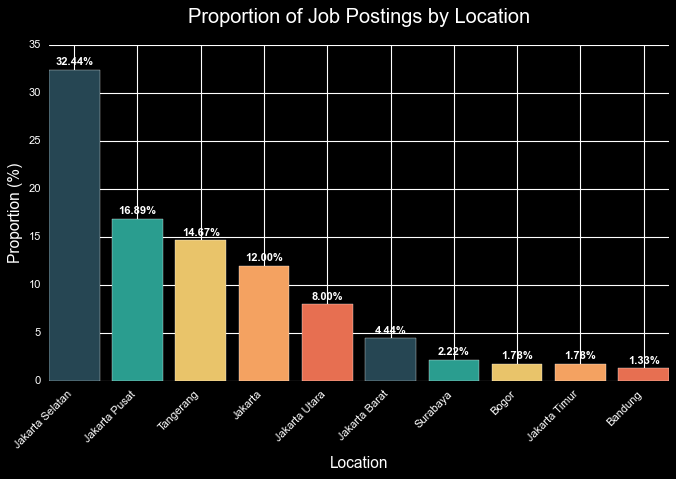

In [301]:
# Tampilkan hasil

top_city_dict = df['Location'].sort_values(ascending=False)

top_city_dict = top_city_dict.value_counts(normalize=True).head(10)
top_city_dict = top_city_dict.apply(lambda x: round(x * 100, 2))

# membuat diagram pie dari proporsi kota
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.pie(top_city_dict, labels=top_city_dict.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1, textprops={'fontsize': 10})
# ax.axis('equal')
# ax.set_title('Proporsi Kota')
# plt.show()

# membuat diagram batang
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
ax.bar(top_city_dict.index, top_city_dict.values, color=colors)

# menambahkan label sumbu x dan y
ax.set_xlabel('Location', fontsize=14)
ax.set_ylabel('Proportion (%)', fontsize=14)

# menambahkan judul diagram
ax.set_title('Proportion of Job Postings by Location', fontsize=18, pad=20)

# menyesuaikan margin pada sumbu x
plt.subplots_adjust(bottom=0.2)

# menambahkan jarak pada label sumbu x
plt.xticks(rotation=45, ha='right')

# menyembunyikan garis sumbu y
ax.spines['left'].set_visible(False)

# menambahkan nilai proporsi pada setiap batang
for i, v in enumerate(top_city_dict.values):
    ax.text(i, v+0.5, f"{v:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.show()


Bedasarkan data yang ditampilkan maka urutan Lowongan pekerjaan untuk "Data" bedasarkan lokasi yang ditampilkan adalah :

1. Jakarta Selatan
2. Jakarta Pusat
3. Tanggerang
4. Jakarta
5. Jakarta Utara
6. Jakarta Barat
7. Surabaya
8. Jakata Timur
9. Bogor
10. Bandung

Namun untuk melihat perbandingan jika Kota Jakarta dijadikan satu adalah :

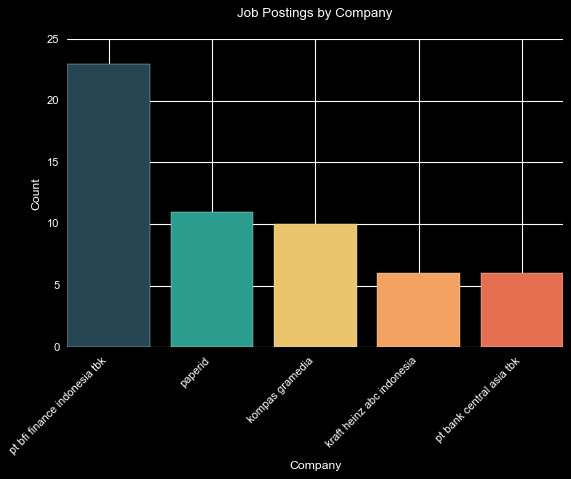

<Figure size 800x480 with 0 Axes>

In [334]:
company = df['Company'].sort_values(ascending=False).value_counts().head()
# menyesuaikan margin pada sumbu x
plt.subplots_adjust(bottom=0.2)

# menambahkan jarak pada label sumbu x
plt.xticks(rotation=45, ha='right')


# membuat diagram batang
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
plt.bar(company.index, company.values, color=colors)

# menambahkan label sumbu x dan y
plt.xlabel('Company')
plt.ylabel('Count')


# menambahkan judul diagram
plt.title('Job Postings by Company', pad=20)

#Merubah Backrground

plt.style.use('dark_background')
plt.figure(facecolor='grey',figsize=(10, 6))

# menampilkan diagram
plt.show()

In [312]:
df[['Published_At','Application_Deadline']].value_counts()

Published_At  Application_Deadline
a month       30 May                  13
2 months      30 May                   8
a month       29 May                   7
24 days       11 Jun                   6
a month       26 May                   6
                                      ..
23 days       30 Dec                   1
10 days       21 May                   1
23 days       11 Jun                   1
              11 Dec                   1
10 days       10 Jun                   1
Name: count, Length: 131, dtype: int64

In [313]:
import numpy as np
# fungsi untuk mengubah nilai menjadi timedelta jika dapat diubah
def to_timedelta(val):
    try:
        return pd.Timedelta(val)
    except:
        pass
    try:
        if 'years' in val:
            val = val.replace('years', '').strip()
            return int(val) * pd.Timedelta(days=365)
        if 'year' in val:
            val = val.replace('year', '').strip()
            return int(val) * pd.Timedelta(days=365)
        if 'months' in val:
            val = val.replace('months', '').strip()
            return int(val) * pd.Timedelta(days=30)
        if 'days' in val:
            val = val.replace('days', '').strip()
            return pd.Timedelta(days=int(val))
        if 'month' in val:
            return pd.Timedelta(days=30)
        if 'day' in val:
            return pd.Timedelta(days=1)
        # if 'hours' in val:
        #     return pd.Timedelta(days=1)
        if 'minute' in val:
            val = val.replace('minute', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'minutes' in val:
            val = val.replace('minutes', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'hour' in val:
            val = val.replace('an', '1').replace('hour', '').strip()
            return pd.Timedelta(minutes=int(val))
        if 'hours' in val:
            val = val.replace('hours', '').strip()
            return pd.Timedelta(minutes=int(val))
    except:
        pass
    return np.nan

now = pd.Timestamp.now()
# konversi kolom posted_date menjadi timedelta
df['Posted_Date'] = df['Published_At'].apply(to_timedelta)
df['Posted_Date'] = now - df['Posted_Date']
df['Posted_Date']
df['Posted_Date'] = df['Posted_Date'].apply(lambda x: x.strftime('%d-%m-%Y'))
df['Posted_Date'] = pd.to_datetime(df['Posted_Date'], format='%d-%m-%Y')


In [314]:
df.head()

,Company,Title,Location,Published_At,Application_Deadline,Posted_Date
0,paninbank,mis data analytics,Jakarta Pusat,2 days,11 May,2023-05-05
1,pt panin daiichi life bancassurance,bancassurance oficer area pluit cengkareng bek...,North Jakarta,2 days,3 Jul,2023-05-05
2,pt mobilitas digital indonesia,b2b commercial sales account,East Jakarta,2 days,4 Jun,2023-05-05
3,ati business group,corporate it leader,Central Jakarta,2 days,3 Jul,2023-05-05
4,schoters,data analyst,South Jakarta,2 days,3 Jul,2023-05-05


In [318]:
df[['Published_At','Posted_Date']].value_counts()

Published_At  Posted_Date
a month       2023-04-07     67
2 months      2023-03-08     38
5 days        2023-05-02     16
25 days       2023-04-12     14
4 days        2023-05-03     10
3 days        2023-05-04     10
10 days       2023-04-27     10
20 days       2023-04-17      9
19 days       2023-04-18      9
23 days       2023-04-14      9
24 days       2023-04-13      8
12 days       2023-04-25      7
2 days        2023-05-05      6
11 days       2023-04-26      4
9 days        2023-04-28      3
3 months      2023-02-06      2
17 days       2023-04-20      2
18 days       2023-04-19      1
Name: count, dtype: int64

In [319]:
df.dtypes

Company                         object
Title                           object
Location                        object
Published_At                    object
Application_Deadline            object
Posted_Date             datetime64[ns]
dtype: object

In [320]:
df[df['Posted_Date'].dt.year == 2022][['Application_Deadline','Posted_Date']]

,Application_Deadline,Posted_Date


In [321]:
month_dict = {
    'Jan': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Apr': 'April',
    'May': 'May',
    'Jun': 'June',
    'Jul': 'July',
    'Aug': 'August',
    'Sep': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December'
}
df['Application_Deadline'] = df['Application_Deadline'].apply(lambda x: ' '.join([month_dict[i] if i in month_dict else i for i in x.split()]))
df['Deadline_Date'] = df['Application_Deadline'].apply(lambda x: x + ' 2023')
df['Deadline_Date'] = pd.to_datetime(df['Deadline_Date'], format='%d %B %Y')

In [322]:
df[['Deadline_Date']].value_counts()

Deadline_Date
2023-05-30       34
2023-06-29       15
2023-05-29       11
2023-12-30        9
2023-06-11        8
                 ..
2023-05-15        1
2023-06-03        1
2023-07-09        1
2023-07-10        1
2023-03-17        1
Name: count, Length: 74, dtype: int64

In [332]:
df

,Company,Title,Location,Published_At,Application_Deadline,Posted_Date,Deadline_Date
0,paninbank,mis data analytics,Jakarta Pusat,2 days,11 May,2023-05-05,2023-05-11
1,pt panin daiichi life bancassurance,bancassurance oficer area pluit cengkareng bek...,North Jakarta,2 days,3 July,2023-05-05,2023-07-03
2,pt mobilitas digital indonesia,b2b commercial sales account,East Jakarta,2 days,4 June,2023-05-05,2023-06-04
3,ati business group,corporate it leader,Central Jakarta,2 days,3 July,2023-05-05,2023-07-03
4,schoters,data analyst,South Jakarta,2 days,3 July,2023-05-05,2023-07-03
...,...,...,...,...,...,...,...
220,ntt indonesia technology,etl consultant,South Jakarta,2 months,30 May,2023-03-08,2023-05-30
221,pt berlian sistem informasi,it product management,Jakarta Timur,2 months,19 September,2023-03-08,2023-09-19
222,pt sinar mas digital ventures,operations lead,Bekasi,2 months,22 May,2023-03-08,2023-05-22
223,pt bfi finance indonesia tbk,bfi finance x arkavidia data engineer,Tangerang,3 months,30 December,2023-02-06,2023-12-30


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Company               225 non-null    object        
 1   Title                 225 non-null    object        
 2   Location              225 non-null    object        
 3   Published_At          225 non-null    object        
 4   Application_Deadline  225 non-null    object        
 5   Posted_Date           225 non-null    datetime64[ns]
 6   Deadline_Date         225 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 12.4+ KB


In [326]:
df[df.duplicated()].value_counts().head()

Series([], Name: count, dtype: int64)

In [327]:
df.drop_duplicates(inplace=True)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Company               225 non-null    object        
 1   Title                 225 non-null    object        
 2   Location              225 non-null    object        
 3   Published_At          225 non-null    object        
 4   Application_Deadline  225 non-null    object        
 5   Posted_Date           225 non-null    datetime64[ns]
 6   Deadline_Date         225 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 12.4+ KB


In [214]:
df[df.duplicated()]

,Company,Title,Location,Published_At,Application_Deadline


Dari data diatas menunjukan masih terdapat data yang belum bersih dimana nama kota masih menujukan data yang tidak valid dan dari data 10 besar yang tampilkan hanya terdapat 2 kota yang muncul yaitu Jakarta dan Tangerang. Untuk itu saya akan bersihkan menjadi nama kota seutuhnya

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 206
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      148 non-null    object
 1   Title        148 non-null    object
 2   Location     148 non-null    object
 3   Posted_Date  148 non-null    object
 4   Apply_Date   148 non-null    object
dtypes: object(5)
memory usage: 6.9+ KB
